<h1 align="center">Оценка качества моделей и отбор признаков</h1>

МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Зухба Анастасия, a__l@mail.ru

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:



**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall <номер_группы> <фамилия>``, к примеру -- ``ML2016_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: В каких ситуациях полезно использовать AUC-ROC?

AUC-ROC полезно использовать тогда, когда важна доля неверно принятых объектов относительно общего числа отрицательных. При этом классы должны быть сбалансированы.

**Вопрос 2**: Когда использование precision/recall предпочтительнее, чем AUC-ROC?

Использование PR-кривой предпочтительнее использования AUC-ROC-кривой в случае, когда классы несбалансированы (положительный класс существенно меньше по размеру). Это происходит из-за того, что AUC-ROC измеряет долю неверно принятых объектов относительно общего числа отрицательных. PR исправляет данную проблему, так как зависит от полноты и точности.

**Вопрос 3**: Для чего используются внутренние критерии, а для чего внешние?

Внутренний критерий характеризует качество метода на обучающей выборке, используется для подбора параметров. Внешний критерий характеризует качество метода на выборке, не использовавшейся в обучении, нужен для проверки того, как алгоритм будет работать на неизвестных ему данных и того, что не произошло переобучение.

**Вопрос 4**: Чем эмпирические критерии отличаются от аналитических?

Эмпирические критерии заключаются в усреднении оценок на множестве, аналитические - в получении оценки события и введении соответствующих коррекций.

**Вопрос 5**: Что такое критерий регуляризации?

Критерий регуляризации - внутренний критерий, в котором добавлен штраф за сложность алгоритма. Нужен для того, чтобы избежать переобучения.

# Определение спама по тексту электронного письма

Попробуем при помощи моделей машинного обучения построить алгоритм, отделяющий спам от нормальной почты. Для экспериментов воспользуемся небольшим набором данных с UCI. Объекты в датасете соответствуют письмам, которые описаны признаками на основе текста письма, спам — положительный пример для классификации, хорошее письмо — отрицательный пример.

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Загрузка датасета Spambase

In [68]:
import pandas
import urllib2

SPAMBASE_NAMES_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names'
SPAMBASE_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'

feature_names = [
    line.strip().split(':')[0] 
    for line in urllib2.urlopen(SPAMBASE_NAMES_URL).readlines()[33:]
]
spam_data = pandas.read_csv(SPAMBASE_DATA_URL, header=None, names=(feature_names + ['spam']))
 
X, y = spam_data.ix[:, :-1].values, spam_data.ix[:, -1].values
 
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


**Задание**
- Сколько примеров писем в датасете?
- Какова доля плохих писем?
- Какие характерные группы признаков представлены в наборе?

In [4]:
print("Emails number:")
print(len(spam_data))

Emails number:
4601


In [5]:
print("Bad emails:")
all = len(y)
bad = len([elem for elem in y if elem == 1])
print(double(bad) / all)

Bad emails:
0.394044772875


In [6]:
print(spam_data.columns)

Index([u'word_freq_make', u'word_freq_address', u'word_freq_all',
       u'word_freq_3d', u'word_freq_our', u'word_freq_over',
       u'word_freq_remove', u'word_freq_internet', u'word_freq_order',
       u'word_freq_mail', u'word_freq_receive', u'word_freq_will',
       u'word_freq_people', u'word_freq_report', u'word_freq_addresses',
       u'word_freq_free', u'word_freq_business', u'word_freq_email',
       u'word_freq_you', u'word_freq_credit', u'word_freq_your',
       u'word_freq_font', u'word_freq_000', u'word_freq_money',
       u'word_freq_hp', u'word_freq_hpl', u'word_freq_george',
       u'word_freq_650', u'word_freq_lab', u'word_freq_labs',
       u'word_freq_telnet', u'word_freq_857', u'word_freq_data',
       u'word_freq_415', u'word_freq_85', u'word_freq_technology',
       u'word_freq_1999', u'word_freq_parts', u'word_freq_pm',
       u'word_freq_direct', u'word_freq_cs', u'word_freq_meeting',
       u'word_freq_original', u'word_freq_project', u'word_freq_re',
       u

Характерные группы признаков: word_freq, char_freq, capital_run_length

### Обучение классификатора и оценка его качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучение (train) и контроль (test). Выбор пропорции разбиения — компромисс: большой размер обучения ведет к более богатым информацией и качественным алгоритмам, большой размер контрольной выборки ведет к менее шумной оценке качества.

Для оценки качества классификации рассматривают матрицу ошибок: строчки соответствуют истинному классу, столбцы — предсказанному классификатором, ячейки содержат число примеров тестовой выборки.

<img src="confusion_matrix.png">

Диагональ матрицы ошибок содержит правильно классифицированные положительные (TP) и отрицательные (TN) примеры. False Positive (FP) — ошибки I рода (ложное срабатывание, положили в спам хорошее письмо), False Negative (FN) — ошибки II рода (не отфильтровали спам). Ошибки I и II рода могут иметь различную стоимость.

Часто рассматриваются следующие метрики качества бинарной классификации:

- Accuracy = (TP + TN) / (TP + TN + FP + FN) — доля правильных ответов
- Precision = TP / (TP + FP) — точность, доля спама среди писем, классифицированных как спам
- Recall = TP / (TP + FN) — полнота, доля спама, которая была отфильтрована
- F1 = 2TP / (2TP + FP + FN) — среднее гармоническое между точностью и полнотой

**Задание**
- Разбейте набор примеров на две непересекающиеся подвыборки следующим образом: train — первые 3000 примеров (≈65%), test — все остальные примеры.
- Обучите решающее дерево на train. Классифицируйте примеры из test. Посчитайте метрики качества классификации, описанные выше: Accuracy, Precision, Recall, F1. Рекомендованные параметры решающего дерева: разбиение по критерию gini, максимальная глубина: 7.
- Какие есть недостатки у получившейся оценки качества на подвыборке test? Как можно сделать оценку качества более информативной?
- Повторите эксперимент, перемешав случайно объекты исходной выборки перед разбиением.
- Какие признаки оказались наиболее важными для определения спама? Воспользуйтесь оценками важности признаков, полученых при построении решающего дерева.
- Какое качество дает лучшая константная модель (определяющая класс определенно и вне зависимости от признаков)?
- Обучите модель KNN и оцените ее качество на test. Рекомендованные параметры: K=10, евклидова метрика в качестве расстояния.
- Обучите модель KNN, предварительно приведя значения признаков к одинаковому масштабу. Оцените качество полученной модели на test. Дает ли подобное преобразование признаков прирост качества для модели KNN? Проделайте тот же эксперимент с решающим деревом. Почему масштабирование признаков не влияет на качество решающего дерева, но повышает качество классификации модели KNN?
- Сравните все обученные модели по всем метрикам.


В итоге должны быть построены и сравнены между собой следующие модели:

1) Константная модель
2) Решающее дерево
3) KNN
4) KNN с масштабированием признаков

In [7]:
train_size = 3000
test_size = len(X) - train_size
X_train, y_train, X_test, y_test = X[:train_size], y[:train_size], X[train_size:], y[train_size:]

In [8]:
print(y_test)

[0 0 0 ..., 0 0 0]


Недостатки заключаются в том, что все данные в test относятся к классу 0, так как перечислялось по порядку: сначала весь класс 1, потом весь класс 2. Поэтому мы можем измерить только accuracy.

In [41]:
data = spam_data.ix[:, ].values;
random.seed(123)
np.random.shuffle(data)
X = [elem[:-1] for elem in data]
y = [elem[-1] for elem in data]

In [42]:
train_size = 3000
test_size = len(X) - train_size
X_train, y_train, X_test, y_test = X[:train_size], y[:train_size], X[train_size:], y[train_size:]

In [43]:
print(y_test[:10])

[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0]


<h4>Решающее дерево

In [10]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=7)
dtc.fit(X_train, y_train)
y_train_predict = dtc.predict(X_train)
y_test_predict = dtc.predict(X_test)
print(accuracy_score(y_train, y_train_predict), accuracy_score(y_test, y_test_predict))
print(precision_score(y_train, y_train_predict), precision_score(y_test, y_test_predict))
print(recall_score(y_train, y_train_predict), recall_score(y_test, y_test_predict))
print(f1_score(y_train, y_train_predict), f1_score(y_test, y_test_predict))

(0.94866666666666666, 0.89943785134291065)
(0.97153351698806245, 0.92280071813285458)
(0.89585097375105838, 0.81329113924050633)
(0.93215859030837001, 0.86459209419680416)


In [11]:
most_important_features = argsort(dtc.feature_importances_)[::-1]
for idx in most_important_features:
    print '%d \t%s \timportance = %.2f' % (idx, spam_data.columns[idx].ljust(30), dtc.feature_importances_[idx])

52 	char_freq_$                    	importance = 0.42
6 	word_freq_remove               	importance = 0.19
51 	char_freq_!                    	importance = 0.10
24 	word_freq_hp                   	importance = 0.08
15 	word_freq_free                 	importance = 0.03
55 	capital_run_length_longest     	importance = 0.03
45 	word_freq_edu                  	importance = 0.03
44 	word_freq_re                   	importance = 0.02
26 	word_freq_george               	importance = 0.02
23 	word_freq_money                	importance = 0.02
48 	char_freq_;                    	importance = 0.01
41 	word_freq_meeting              	importance = 0.01
21 	word_freq_font                 	importance = 0.01
16 	word_freq_business             	importance = 0.01
56 	capital_run_length_total       	importance = 0.01
54 	capital_run_length_average     	importance = 0.01
7 	word_freq_internet             	importance = 0.00
47 	word_freq_conference           	importance = 0.00
29 	word_freq_labs            

<h4> Константная модель

In [45]:
y_1 = [1.0] * len(y)
y_0 = [0.0] * len(y)

print("Константа 1:")
print(accuracy_score(y, y_1))
print(precision_score(y, y_1))
print(recall_score(y, y_1))
print(f1_score(y, y_1))
print("")

print("Константа 0:")
print(accuracy_score(y, y_0))
print(precision_score(y, y_0))
print(recall_score(y, y_0))
print(f1_score(y, y_0))

Константа 1:
0.394044772875
0.394044772875
1.0
0.565325849704

Константа 0:
0.605955227125
0.0
0.0
0.0


<h4> kNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(X_train, y_train)
y_train_predict = knc.predict(X_train)
y_test_predict = knc.predict(X_test)
print(accuracy_score(y_train, y_train_predict), accuracy_score(y_test, y_test_predict))
print(precision_score(y_train, y_train_predict), precision_score(y_test, y_test_predict))
print(recall_score(y_train, y_train_predict), recall_score(y_test, y_test_predict))
print(f1_score(y_train, y_train_predict), f1_score(y_test, y_test_predict))

(0.83566666666666667, 0.77763897564022488)
(0.84399999999999997, 0.76037735849056609)
(0.71464860287891618, 0.63765822784810122)
(0.77395690050435584, 0.69363166953528399)


<h4> kNN с масштабированием признаков

In [14]:
from sklearn.preprocessing import scale

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
print(X_train_scaled)

[[-0.33048431 -0.16379498 -0.55179569 ..., -0.11650269 -0.34099737
  -0.37501484]
 [-0.33048431 -0.16379498 -0.55179569 ..., -0.03171094 -0.27244715
  -0.33782666]
 [-0.33048431 -0.16379498 -0.55179569 ..., -0.10800172 -0.28101593
  -0.39205942]
 ..., 
 [-0.33048431 -0.16379498 -0.55179569 ..., -0.09274356 -0.22103448
  -0.36416829]
 [-0.00702975  0.4429051   0.68456486 ..., -0.09217683 -0.16105304
   0.20914939]
 [-0.10406612 -0.16379498  0.54497576 ..., -0.04121459  0.2502483
   0.64611042]]


In [74]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(X_train_scaled, y_train)
y_train_predict = knc.predict(X_train_scaled)
y_test_predict = knc.predict(X_test_scaled)
print(accuracy_score(y_train, y_train_predict), accuracy_score(y_test, y_test_predict))
print(precision_score(y_train, y_train_predict), precision_score(y_test, y_test_predict))
print(recall_score(y_train, y_train_predict), recall_score(y_test, y_test_predict))
print(f1_score(y_train, y_train_predict), f1_score(y_test, y_test_predict))

(0.91900000000000004, 0.89444097439100567)
(0.94161958568738224, 0.91711711711711708)
(0.84674005080440307, 0.805379746835443)
(0.89166295140436924, 0.85762426284751458)


<h4>Решающее дерево c масштабированием признаков

In [16]:
from sklearn.preprocessing import scale

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [17]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=7)
dtc.fit(X_train_scaled, y_train)
y_train_predict = dtc.predict(X_train_scaled)
y_test_predict = dtc.predict(X_test_scaled)
print(accuracy_score(y_train, y_train_predict), accuracy_score(y_test, y_test_predict))
print(precision_score(y_train, y_train_predict), precision_score(y_test, y_test_predict))
print(recall_score(y_train, y_train_predict), recall_score(y_test, y_test_predict))
print(f1_score(y_train, y_train_predict), f1_score(y_test, y_test_predict))

(0.94866666666666666, 0.89194253591505313)
(0.97153351698806245, 0.8883248730964467)
(0.89585097375105838, 0.83069620253164556)
(0.93215859030837001, 0.85854456255110378)


Итак, масштабирование признаков улучшает результат kNN, но ухудшает результат решающего дерева. Это происходит из-за того, что для kNN важно расстояние (без масштабирования одни признаки оказывают больше влияния, чем другие), а для решающего дерева, наоборот, масштабирование является потерей части данных.

Итог: по всем метрикам Решающее дерево > kNN c масштабированием > Константный алгоритм.

### Выбор порога классификации

Многие модели классификации получают оценку принадлежности положительному классу $y'(x)\in R$. Затем принимают решение о классе объекта путем сравнения оценки с порогом: $y(x)=+1$, если $y'(x)<\theta$, $y(x)=−1$, если $y'(x)\geq\theta$

Матрица ошибок и все производные от нее метрики (Accuracy, Precision, Recall, etc.) зависят от порога $\theta$.


<img src="binary_threshold.png">

Для того чтобы видеть изменения метрик при всех значениях порога классификации, рассматривают координатную плоскость, по осям которой отложены значения метрик, а качество работы классификатора представлено в виде кривой — траектории изменения соответствующих метрик при варьировании порога:

<img src="roc_trajectory.png">

Наиболее распространены ROC-кривые (плоскость TP-vs-FP) и Precision/Recall кривые. Аббревиатура ROC (Receiver Operating Characteristic) была унаследована из инженерного дела.

<img src="roc_and_pr_curves.png">

В случае, если необходимо сравнить качество классификаторов вне зависимости от порога, применяют интегральные числовые метрики, например AUC-ROC (Area Under ROC) — площадь под ROC-кривой классификатора. AUC-ROC идеально работающего классификатора равно 1. Идеальный случайный классификатор в среднем имеет AUC-ROC=0.5.



**Задача 1**

 Определите функционал «доля дефектных пар» для задачи бинарной классификации. Как данный функционал связан с AUC-ROC?

$$DP(a, X^l) = 1 - \frac{2}{l(l - 1)}\sum_{i<j}^{l} [y_{(i)} > y_{(j)}]$$
$$DP = 1 - \frac{2 l_-l_+}{l(l - 1)}(1 - AUC)$$

**Задача 2**

Приведите пример целевого вектора $y_1, \ldots , y_l$ и ответов алгоритма $b(x_1),\ldots,b(x_l)$, для которых AUC-ROC будет равен 0.5.


$$(y_1, y_2 , y_3) = (1, 0, 1)$$ <br>
$$(b(x_1), b(x_2), b(x_3)) = (0.5, 0.6, 0.7)$$
$$AUC(x) = 1 - \frac{1}{l_+l_-}\sum_{i<j} [y_{(i)} > y_{(j)}]$$
$$AUC(x) = 1 - \frac{1}{2}*1 = \frac{1}{2}$$

**Задание**

 Верно ли, что классификаторы из предыдущей части действуют путем сравнения некоторой оценки принадлежности положительному классу с порогом? Что это за оценки принадлежности? Какие пороги были выбраны?
 
 Для всех моделей, построенных в предыдущем задании:
- Постройте ROC и Precision/Recall кривые в одних координатных осях, линиями разных цветов. Добавьте легенду: какая кривая соответствует какому классификатору.
- Сравните значения AUC-ROC.

Какой максимальной полноты определения спама достигают построенные классификаторы, если перед вами стоит жесткое ограничение: точность классификатора не может быть меньше 90%?



In [118]:
data = spam_data.ix[:, ].values;
random.seed(120)
np.random.shuffle(data)
X = [elem[:-1] for elem in data]
y = [elem[-1] for elem in data]

In [119]:
train_size = 3000
test_size = len(X) - train_size
X_train, y_train, X_test, y_test = X[:train_size], y[:train_size], X[train_size:], y[train_size:]

In [120]:
from sklearn.preprocessing import scale

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

<h4>Precision/Recall

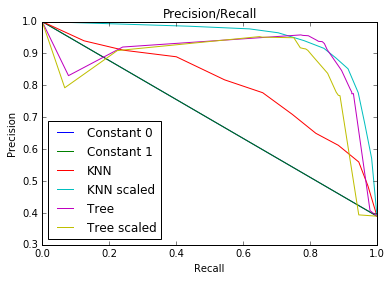

In [121]:
from sklearn.metrics import precision_recall_curve

curve_const_0 = np.array(precision_recall_curve(y_test, np.zeros_like(y_test)))
curve_const_1 = np.array(precision_recall_curve(y_test, np.ones_like(y_test)))

clf_knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
proba_knn = clf_knn.predict_proba(X_test)[:,1]
curve_knn = np.array(precision_recall_curve(y_test, proba_knn))

clf_knn_scaled = KNeighborsClassifier(n_neighbors=10).fit(X_train_scaled, y_train)
proba_knn_scaled = clf_knn_scaled.predict_proba(X_test_scaled)[:,1]
curve_knn_scaled = np.array(precision_recall_curve(y_test, proba_knn_scaled))

clf_tree = DecisionTreeClassifier(max_depth=7).fit(X_train, y_train)
proba_tree = clf_tree.predict_proba(X_test)[:,1]
curve_tree = np.array(precision_recall_curve(y_test, proba_tree))

clf_tree_scaled = DecisionTreeClassifier(max_depth=7).fit(X_train_scaled, y_train)
proba_tree_scaled = clf_tree_scaled.predict_proba(X_test_scaled)[:,1]
curve_tree_scaled = np.array(precision_recall_curve(y_test, proba_tree_scaled))

plt.plot(curve_const_0[1], curve_const_0[0], label='Constant 0')
plt.plot(curve_const_1[1], curve_const_1[0], label='Constant 1')
plt.plot(curve_knn[1], curve_knn[0], label='KNN')
plt.plot(curve_knn_scaled[1], curve_knn_scaled[0], label='KNN scaled')
plt.plot(curve_tree[1], curve_tree[0], label='Tree')
plt.plot(curve_tree_scaled[1], curve_tree_scaled[0], label='Tree scaled')

plt.title("Precision/Recall")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

plt.show()

In [130]:
knn_scaled_big_precision = map(lambda x, y: y if x > 0.9 else 0, curve_knn_scaled[0], curve_knn_scaled[1])
max_recall = max(knn_scaled_big_precision)
print(max_recall)

0.841346153846


In [131]:
tree_big_precision = map(lambda x, y: y if x > 0.9 else 0, curve_tree[0], curve_tree[1])
max_recall = max(tree_big_precision)
print(max_recall)

0.850961538462


То есть максимальную полноту дает решающее дерево

<h4>AUC-ROC

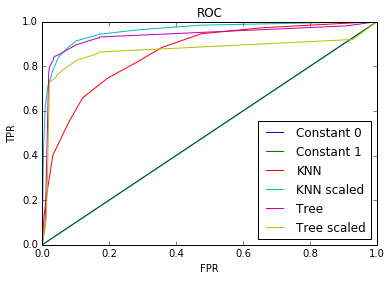

In [92]:
from sklearn.metrics import roc_curve

curve_const_0 = np.array(roc_curve(y_test, np.zeros_like(y_test)))
curve_const_1 = np.array(roc_curve(y_test, np.ones_like(y_test)))

clf_knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
proba_knn = clf_knn.predict_proba(X_test)[:,1]
curve_knn = np.array(roc_curve(y_test, proba_knn))

clf_knn_scaled = KNeighborsClassifier(n_neighbors=10).fit(X_train_scaled, y_train)
proba_knn_scaled = clf_knn_scaled.predict_proba(X_test_scaled)[:,1]
curve_knn_scaled = np.array(roc_curve(y_test, proba_knn_scaled))

clf_tree = DecisionTreeClassifier(max_depth=7).fit(X_train, y_train)
proba_tree = clf_tree.predict_proba(X_test)[:,1]
curve_tree = np.array(roc_curve(y_test, proba_tree))

clf_tree_scaled = DecisionTreeClassifier(max_depth=7).fit(X_train_scaled, y_train)
proba_tree_scaled = clf_tree_scaled.predict_proba(X_test_scaled)[:,1]
curve_tree_scaled = np.array(roc_curve(y_test, proba_tree_scaled))

plt.plot(curve_const_0[0], curve_const_0[1], label='Constant 0')
plt.plot(curve_const_1[0], curve_const_1[1], label='Constant 1')
plt.plot(curve_knn[0], curve_knn[1], label='KNN')
plt.plot(curve_knn_scaled[0], curve_knn_scaled[1], label='KNN scaled')
plt.plot(curve_tree[0], curve_tree[1], label='Tree')
plt.plot(curve_tree_scaled[0], curve_tree_scaled[1], label='Tree scaled')

plt.title("ROC")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')

plt.show()

In [93]:
from sklearn.metrics import roc_auc_score

print "Значения AUC-ROC:"
print "Constant 0: ".ljust(15), roc_auc_score(y_test, np.zeros_like(y_test))
print "Constant 1: ".ljust(15), roc_auc_score(y_test, np.ones_like(y_test))
print "KNN: ".ljust(15), roc_auc_score(y_test, proba_knn)
print "KNN scaled: ".ljust(15), roc_auc_score(y_test, proba_knn_scaled)
print "Tree: ".ljust(15), roc_auc_score(y_test, proba_tree)
print "Tree scaled: ".ljust(15), roc_auc_score(y_test, proba_tree_scaled)

Значения AUC-ROC:
Constant 0:     0.5
Constant 1:     0.5
KNN:            0.859873238328
KNN scaled:     0.958918097
Tree:           0.934380166916
Tree scaled:    0.869591141117


Побеждает kNN с масштабированием признаков

### Кросс-валидация и подбор параметров

Каждая модель машинного обучения имеет множество структурных параметров и параметров обучения: число соседей и тип функции расстояния в KNN, максимальная высота дерева, минимальное число объектов в листе дерева и т.д. Нет универсальных наборов параметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор параметров.

Для оптимизации параметров модели часто используют перебор по сетке (grid search): для каждого параметра выбирается несколько значений, перебираются все комбинации значений параметров и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется).

Сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит переобучение на тестовую выборку.

Для устранения этой проблемы, данные разбивают на 3 непересекающихся подвыборки: обучение (train), валидация (validation) и контроль (test).

Валидационную подвыборку используют для сравнения моделей, а test — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.

Более надежный способ объективного сравнения моделей — кросс-валидация. Существуют различные схемы кросс-валидации:

- Leave-One-Out
- K-Fold
- Многократное случайное разбиение выборки
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинаций. С учетом конечности времени на выполнение задания, возникает ряд компромиссов:

- сетку можно делать более разреженной, перебирая меньше значений каждого параметра, но в таком случае можно пропустить хорошую комбинацию параметров;
- кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
- параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
- перебирать не все комбинации параметров, а небольшое число случайно выбранных.

**Задание**
- Выберите схему кросс-валидаци, одну из перечисленных выше. Зафиксируйте разбиение кросс-валидации обучающей выборки. Кросс-валидировать нужно по выборке train из предыдущих заданий, test должен остаться независимым. Обратите внимание: при сравнении моделей, набор разбиений кросс-валидации не должен меняться, должен быть строго фиксированным.
- Выберите одну метрику, которую будете оптимизировать при переборе параметров. Например, можно взять AUC-ROC.
- Найдите оптимальный набор параметров дерева, перебрав значения параметров по сетке. Параметры для настройки: критерий разбиения, максимальная глубина, число признаков для каждого узла, минимальное число объектов в листе (или часть из этих параметров).
- Найдите оптимальный набор параметров для KNN, перебрав значения параметров по сетке. Параметры для настройки: число соседей, функция расстояния, схема взвешивания (или часть из этих параметров).
- Сравните полученные модели с моделями из предыдущих заданий. Сравнение необходимо проводить на тестовой выборке, которая не участвовала в подборе и обучении. Сравнение нужно проводить только по метрике которая оптимизировалась.

In [49]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn import grid_search

n_folds = 10

cv = KFold(n=len(y_train), n_folds=n_folds, shuffle=True, random_state=123)

<h4> Решающее дерево

In [64]:
%%time

parameters_grid = {
    'criterion' : ("gini", "entropy"),
    'max_depth' : range(3, 30),
    'max_features' : ("sqrt", "log2"),
    'min_samples_leaf' : range(1, 5),
}

grid_cv = grid_search.GridSearchCV(DecisionTreeClassifier(), parameters_grid, scoring = 'accuracy', cv = cv)

grid_cv.fit(X_train, y_train)

CPU times: user 36.6 s, sys: 233 ms, total: 36.8 s
Wall time: 37 s


In [65]:
clf = grid_cv.best_estimator_

In [66]:
clf = grid_cv.best_estimator_
print grid_cv.best_score_
print grid_cv.best_params_

0.918
{'max_features': 'sqrt', 'criterion': 'entropy', 'max_depth': 21, 'min_samples_leaf': 1}


In [68]:
clf.fit(X_train, y_train)
y_test_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_test_predict))

0.904434728295


<h4> kNN с масштабированием признаков

In [70]:
from sklearn.preprocessing import scale

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [71]:
%%time

from sklearn.neighbors import KNeighborsClassifier

parameters_grid = {
    'n_neighbors' : range(1, 20),
    'p' : range(1, 5),
}

grid_cv = grid_search.GridSearchCV(KNeighborsClassifier(), parameters_grid, scoring = 'accuracy', cv = cv)

grid_cv.fit(X_train_scaled, y_train)

CPU times: user 3min 53s, sys: 1.07 s, total: 3min 54s
Wall time: 3min 56s


In [72]:
clf = grid_cv.best_estimator_
print grid_cv.best_score_
print grid_cv.best_params_

0.913666666667
{'n_neighbors': 1, 'p': 1}


In [73]:
clf.fit(X_train_scaled, y_train)
y_test_predict = clf.predict(X_test_scaled)
print(accuracy_score(y_test, y_test_predict))

0.881324172392


<h1 align="center">Примеры</h1> 

## Обучение решающего дерева

In [24]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris_data = load_iris()
X, y = iris_data.data, iris_data.target

clf = DecisionTreeClassifier(max_depth=3).fit(X, y)

y_pred = clf.predict(X)

#### Важность признаков

Важность признаков вычисляется на основании частоты разбиения по признаку и глубины узлов дерева в которых происходило разбиение по признаку.

In [25]:
most_important_features = argsort(clf.feature_importances_)[::-1]
for idx in most_important_features:
    print '%d %s, importance = %.2f' % (idx, iris_data.feature_names[idx], clf.feature_importances_[idx])

3 petal width (cm), importance = 0.95
2 petal length (cm), importance = 0.05
1 sepal width (cm), importance = 0.00
0 sepal length (cm), importance = 0.00


#### Ошибочно классифицированные объекты обучающей выборки

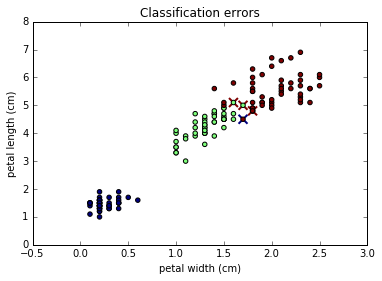

In [26]:
xind, yind = most_important_features[0], most_important_features[1]
err = (y != y_pred)
scatter(X[err, xind], X[err, yind], c=y_pred[err], marker='x', s=80, linewidths=2)
scatter(X[:, xind], X[:, yind], c=y)
xlabel(iris_data.feature_names[xind])
ylabel(iris_data.feature_names[yind])
title(u'Classification errors')

#### Визуализация дерева

In [27]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='tree.dot', feature_names=iris_data.feature_names)

In [28]:
!dot -Tpng tree.dot -o tree.png

/bin/sh: dot: command not found


In [29]:
from IPython.display import Image
Image('tree.png')

## Кросс-валидация

In [30]:
from sklearn.datasets import load_boston
boston_data = load_boston()
X, y = boston_data.data, boston_data.target

Зафиксируем разбиение для 5-fold кросс-валидации.

In [31]:
from sklearn.cross_validation import KFold
cv = KFold(n=len(y), n_folds=5, shuffle=True, random_state=123)

Обратите внимание на аргументы:
 

- shuffle=True — без него фолды будут формироваться из последовательно идущих объектов, что нехорошо — в этом поможет убедиться задание в части 2;
- random_state — если этот параметр не выставить, то после каждого запуска команды будет генерироваться новое разбиение на фолды; крайне желательно, чтобы ваши эксперименты были в точности воспроизводимы — это упрощает исследования.


Оценим качество регрессии KNN на наборе Boston Housing для различных значений K (число соседей). В качестве метрики качества возьмем модуль отклонения:

 $MAE=\sum_i|y_{pred,i}-y_i|$


In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import cross_val_score

Переберем ряд значений n_neigbors, для каждого оценим среднее и стандартное отклонение MAE по кросс-валидации. Магия %%time позволяет измерить время работы ячейки с кодом.

In [33]:
%%time 

k_values = range(1, 10) + range(10, 50, 5)
mae_cv_mean = []
mae_cv_std = []

for k in k_values:
    clf = KNeighborsRegressor(n_neighbors=k)
    mae_folds = -cross_val_score(clf, X, y, cv=cv, scoring='mean_absolute_error')
    mae_cv_mean.append(mae_folds.mean())
    mae_cv_std.append(mae_folds.std())

CPU times: user 241 ms, sys: 55.8 ms, total: 297 ms
Wall time: 300 ms


#### График, демонстрирующий оптимальность выбора числа соседей

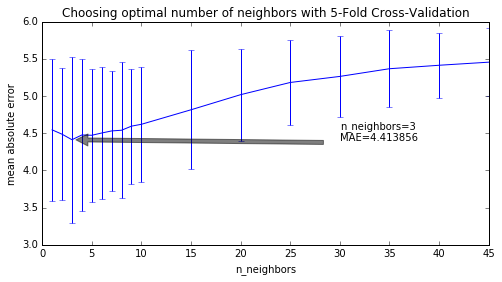

In [34]:
figure(figsize=(8, 4))
errorbar(k_values, mae_cv_mean, yerr=array(mae_cv_std)*2)
title('Choosing optimal number of neighbors with 5-Fold Cross-Validation')
xlabel('n_neighbors')
ylabel('mean absolute error')

opt_idx = argmin(mae_cv_mean)
optimal_k = k_values[opt_idx]
optimal_mae = mae_cv_mean[opt_idx]
annotate('n_neighbors=%d\nMAE=%f' % (optimal_k, optimal_mae), 
         xy=(opt_idx, optimal_mae), xytext=(30, optimal_mae), 
         arrowprops=dict(facecolor='black', shrink=0.05, alpha=0.5))